In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IPython.display as ipd
import time
from collections import Counter, OrderedDict
import cv2
import random
import seaborn as sns
from pathlib import Path
import xml.etree.ElementTree as ET
from natsort import natsorted

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
 
import keras, tensorflow 
from keras.utils.np_utils import to_categorical
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, LeakyReLU 
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop,Adamax, Nadam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import load_model
from keras.models import Input

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras import backend as K
from matplotlib import pyplot
from numpy import expand_dims

from tqdm import tqdm_notebook as tq

from numba import jit

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0
 
from tensorflow.python.util import deprecation


deprecation._PRINT_DEPRECATION_WARNINGS = False

#Read Dataset

In [4]:
path = '/content/drive/MyDrive/PlantVillage'
folders = []
for i in os.listdir(path):
  folders.append(i)
  print(i, len(os.listdir(os.path.join(path, i))))

Tomato_Late_blight 1909
Tomato_Early_blight 1000
Tomato_healthy 1591
Tomato__Tomato_mosaic_virus 373
Tomato_Leaf_Mold 952
Pepper__bell___Bacterial_spot 1007
Tomato_Spider_mites_Two_spotted_spider_mite 1676
Potato___Early_blight 1000
Tomato__Tomato_YellowLeaf__Curl_Virus 3214
Tomato_Bacterial_spot 2127
Pepper__bell___healthy 1478
Potato___healthy 152
Potato___Late_blight 1000
Tomato__Target_Spot 1404
Tomato_Septoria_leaf_spot 1771


In [5]:
from natsort import natsorted
imgs = []
labels = []
shapes = []
dir = path
leng = []
folders = natsorted(os.listdir(path))
#folders.remove('.ipynb_checkpoints')
for folder in folders:
  print(folder)
  for files in tq(natsorted(os.listdir(os.path.join(dir, folder)))):
    try:
      image = cv2.imread(os.path.join(dir, folder, files))
      shapes.append(image.shape)
      image = cv2.resize(image, (96, 96))
      labels.append(folder)
      imgs.append(image)
    except Exception as e:
      print(e)

imgs = np.array(imgs)
labels = np.array(labels)
Counter(shapes)

Pepper__bell___Bacterial_spot


  0%|          | 0/1007 [00:00<?, ?it/s]

Pepper__bell___healthy


  0%|          | 0/1478 [00:00<?, ?it/s]

Potato___Early_blight


  0%|          | 0/1000 [00:00<?, ?it/s]

Potato___Late_blight


  0%|          | 0/1000 [00:00<?, ?it/s]

Potato___healthy


  0%|          | 0/152 [00:00<?, ?it/s]

Tomato_Bacterial_spot


  0%|          | 0/2127 [00:00<?, ?it/s]

Tomato_Early_blight


  0%|          | 0/1000 [00:00<?, ?it/s]

Tomato_Late_blight


  0%|          | 0/1909 [00:00<?, ?it/s]

Tomato_Leaf_Mold


  0%|          | 0/952 [00:00<?, ?it/s]

Tomato_Septoria_leaf_spot


  0%|          | 0/1771 [00:00<?, ?it/s]

Tomato_Spider_mites_Two_spotted_spider_mite


  0%|          | 0/1676 [00:00<?, ?it/s]

Tomato__Target_Spot


  0%|          | 0/1404 [00:00<?, ?it/s]

Tomato__Tomato_YellowLeaf__Curl_Virus


  0%|          | 0/3214 [00:00<?, ?it/s]

'NoneType' object has no attribute 'shape'
Tomato__Tomato_mosaic_virus


  0%|          | 0/373 [00:00<?, ?it/s]

Tomato_healthy


  0%|          | 0/1591 [00:00<?, ?it/s]

Counter({(256, 256, 3): 20653})

#Calculating Class Weight

In [7]:
yy = np.array(yy)
print(yy.shape)

()


In [8]:
from sklearn.utils import class_weight
print(yy.shape)
yy = yy.reshape(20653)
print(yy.shape)
print(np.unique(yy))
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(yy), y=yy)
class_weights

()


ValueError: ignored

In [6]:
yy = 0

In [9]:
len(os.listdir(path))

15

#One Hot Encoding

In [10]:
le=LabelEncoder()
y=le.fit_transform(labels)
y=to_categorical(y,15)
y.shape
labels = 0

#Normalization

In [11]:
imgs = imgs/255
imgs.shape

(20653, 96, 96, 3)

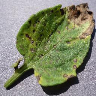

In [12]:
from google.colab.patches import cv2_imshow
cv2_imshow(imgs[11000]*255)

#Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
np.random.seed(24)
x_train,x_test,y_train,y_test=train_test_split(imgs,y,test_size=0.25,)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
imgs = y = 0

(15489, 96, 96, 3)
(5164, 96, 96, 3)
(15489, 15)
(5164, 15)


#Loss Function 

In [14]:
def lossFunc(true, pred):

      axis = -1 #if channels last 
      weightsList = [1.38007355, 0.93094272, 1.37593333, 1.37593333, 9.05219298,
       0.6468892 , 1.37593333, 0.72076131, 1.44530812, 0.77692452,
       0.82096261, 0.9800095 , 0.42877324, 3.68882931, 0.86482296]

      classSelectors = K.argmax(true, axis=axis) 

      classSelectors = [K.equal(K.cast(i,tf.int64), classSelectors) for i in range(len(weightsList))]
      #print('classSelectors2', classSelectors)
      #for i in classSelectors:

      classSelectors = [K.cast(x, K.floatx()) for x in classSelectors]
      #print('classSelectors3', classSelectors)

      weights = [sel * w for sel,w in zip(classSelectors, weightsList)] 
      #print('weights', weights)

      weightMultiplier = weights[0]
      for i in range(1, len(weights)):
          weightMultiplier = weightMultiplier + weights[i]
      #print('weightMultiplier', weightMultiplier, type(weightMultiplier))#, K.print_tensor(weightMultiplier, message="wm"))

      loss = keras.losses.categorical_crossentropy(true,pred) 
      #print('loss', loss.shape, loss)
      loss = loss * weightMultiplier

      return loss


#VGG Arch

In [15]:
########################################################
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Conv1D, Dropout
from keras.layers import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils.vis_utils import plot_model
from keras.layers.merge import concatenate
from keras import *
from keras.metrics import categorical_accuracy


# Block 1
from keras import layers
from keras.layers import Activation, BatchNormalization
from tensorflow.keras.losses import Huber
input_img = Input((96, 96, 3))
x = layers.Conv2D(64, (3, 3),
                  padding='same',
                  name='block1_conv1')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.Conv2D(64, (3, 3),
                  padding='same',
                  name='block1_conv2')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = layers.Conv2D(128, (3, 3),
                  padding='same',
                  name='block2_conv1')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.Conv2D(128, (3, 3),
                  padding='same',
                  name='block2_conv2')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = layers.Conv2D(256, (3, 3),
                  padding='same',
                  name='block3_conv1')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.Conv2D(256, (3, 3),
                  padding='same',
                  name='block3_conv2')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.Conv2D(256, (3, 3),
                  padding='same',
                  name='block3_conv3')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = layers.Conv2D(512, (3, 3),
                  padding='same',
                  name='block4_conv1')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.Conv2D(512, (3, 3),
                  padding='same',
                  name='block4_conv2')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.Conv2D(512, (3, 3),
                  padding='same',
                  name='block4_conv3')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = layers.Conv2D(512, (3, 3),
                  padding='same',
                  name='block5_conv1')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.Conv2D(512, (3, 3),
                  padding='same',
                  name='block5_conv2')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.Conv2D(512, (3, 3),
                  padding='same',
                  name='block5_conv3')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

 
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(15, activation='softmax')(x)

model = Model(inputs=[input_img], outputs=[x])
#model = load_model("/content/drive/MyDrive/mod/rb_model11.h5", custom_objects={'lossFunc':lossFunc})
model.compile(loss=lossFunc ,optimizer=Adam(0.0001),metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 96, 96, 64)        0         
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 64)       256       
 hNormalization)                                             

In [16]:
start = time.time()
#model = load_model('./rb_model.h5')
red_lr= ReduceLROnPlateau(monitor='val_loss',patience=4,verbose=2,factor=0.001,min_delta=0.01)
filepath = r"/content/drive/MyDrive/mod/rb_model11.h5"
check=ModelCheckpoint(filepath = filepath, verbose = 1, save_best_only = True)

History = model.fit(x_train, y_train , epochs=10, verbose = 1 ,validation_data=(x_test, y_test), 
                       callbacks = [check, ], 
                       batch_size = 32, shuffle=True,
                       )

print(time.time()-start)

Epoch 1/10
485/485 [==============================] - ETA: 0s - loss: 2.4310 - acc: 0.2515
Epoch 1: val_loss improved from inf to 3.38719, saving model to /content/drive/MyDrive/mod/rb_model11.h5
485/485 [==============================] - 131s 241ms/step - loss: 2.4310 - acc: 0.2515 - val_loss: 3.3872 - val_acc: 0.1694
Epoch 2/10
485/485 [==============================] - ETA: 0s - loss: 1.8548 - acc: 0.4421
Epoch 2: val_loss improved from 3.38719 to 1.59491, saving model to /content/drive/MyDrive/mod/rb_model11.h5
485/485 [==============================] - 114s 236ms/step - loss: 1.8548 - acc: 0.4421 - val_loss: 1.5949 - val_acc: 0.5488
Epoch 3/10
484/485 [============================>.] - ETA: 0s - loss: 1.4763 - acc: 0.5579
Epoch 3: val_loss improved from 1.59491 to 1.43238, saving model to /content/drive/MyDrive/mod/rb_model11.h5
485/485 [==============================] - 122s 252ms/step - loss: 1.4763 - acc: 0.5579 - val_loss: 1.4324 - val_acc: 0.6082
Epoch 4/10
485/485 [=========

#Accuracy Graph

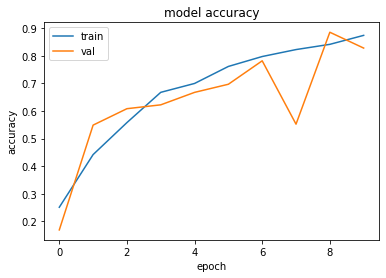

In [17]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Loss Graph

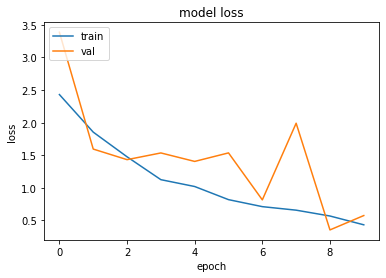

In [18]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Classification Report

162/162 [==============================] - 10s 62ms/step
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       255
           1       0.97      0.96      0.96       342
           2       0.83      0.99      0.90       246
           3       0.81      0.91      0.85       234
           4       0.89      0.94      0.91        34
           5       0.85      0.99      0.91       549
           6       0.70      0.86      0.77       261
           7       0.98      0.54      0.69       473
           8       0.81      0.98      0.88       245
           9       0.86      0.89      0.88       463
          10       0.85      0.94      0.89       432
          11       0.95      0.63      0.76       368
          12       0.99      0.93      0.96       770
          13       0.93      1.00      0.97        84
          14       0.95      1.00      0.97       408

    accuracy                           0.88      5164
   macro avg       0.88

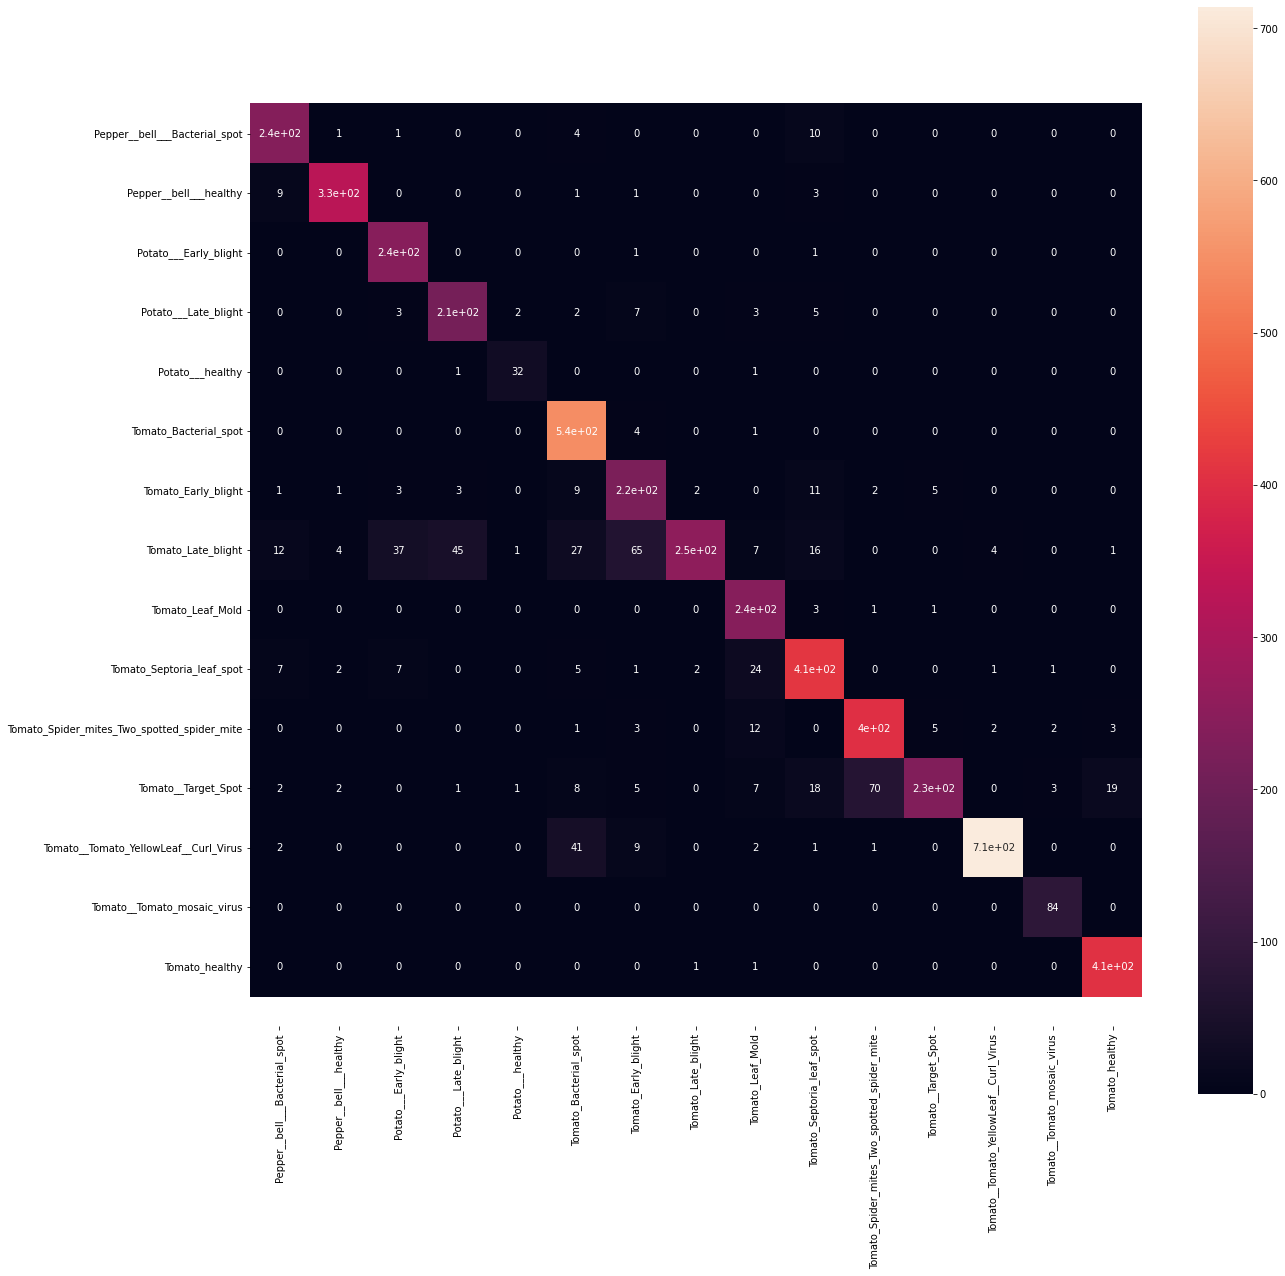

In [19]:
#m4
from sklearn import metrics
arc = load_model(r'/content/drive/MyDrive/mod/rb_model11.h5', custom_objects={'lossFunc':lossFunc})
pred = arc.predict(x_test, verbose=1)
 
lab = natsorted(os.listdir(path))

y_pred_bool = np.argmax(pred, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(metrics.classification_report(y_test1, y_pred_bool))
 
cm = metrics.confusion_matrix(y_test1,y_pred_bool, )
#score = metrics.accuracy_score(y_test,pred)
# print(cm)
df_cm = pd.DataFrame(
    cm, index =lab,
    columns = lab,
)
plt.figure(figsize = (20, 20))
ax = sns.heatmap(df_cm, annot=True, square=True, cbar = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
 
plt.savefig(r"inp.png")
plt.show()
#plt.savefig('/content/drive/MyDrive/projects/tb/inp_confusion_matrix.png')

In [20]:
a=metrics.classification_report(y_test1, y_pred_bool)
type(a)

str

In [21]:
a=metrics.classification_report(y_test1, y_pred_bool)
c=[]
p=[]
r=[]
f=[]
d = []
a=a.split('\n')
print(len(a))
for i in a[2:-5]:
  #print(i)
  d.append(i.replace('       ',',').replace('      ', ',').replace('           ',''))
  #d.append('\n')

d1 = []
for i in d:
  print(i)
  d1.append(i.replace(', ','').replace(' ',''))
d1

for i in d1:
  data = i.split(',')
  c.append(float(data[0])) 
  p.append(float(data[1]))
  r.append(float(data[2]))
  f.append(float(data[3]))

c, p, r, f

22
,    0,0.88,0.94,0.91,255
,    1,0.97,0.96,0.96,342
,    2,0.83,0.99,0.90,246
,    3,0.81,0.91,0.85,234
,    4,0.89,0.94,0.91, 34
,    5,0.85,0.99,0.91,549
,    6,0.70,0.86,0.77,261
,    7,0.98,0.54,0.69,473
,    8,0.81,0.98,0.88,245
,    9,0.86,0.89,0.88,463
,   10,0.85,0.94,0.89,432
,   11,0.95,0.63,0.76,368
,   12,0.99,0.93,0.96,770
,   13,0.93,1.00,0.97, 84
,   14,0.95,1.00,0.97,408


([0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0],
 [0.88,
  0.97,
  0.83,
  0.81,
  0.89,
  0.85,
  0.7,
  0.98,
  0.81,
  0.86,
  0.85,
  0.95,
  0.99,
  0.93,
  0.95],
 [0.94,
  0.96,
  0.99,
  0.91,
  0.94,
  0.99,
  0.86,
  0.54,
  0.98,
  0.89,
  0.94,
  0.63,
  0.93,
  1.0,
  1.0],
 [0.91,
  0.96,
  0.9,
  0.85,
  0.9134,
  0.91,
  0.77,
  0.69,
  0.88,
  0.88,
  0.89,
  0.76,
  0.96,
  0.9784,
  0.97])

In [22]:
len(c), len(p), len(r), len(f)

(15, 15, 15, 15)

In [23]:
for cc, pp, rr, ff in zip(c, p, r, f):
  print(cc, pp, rr, ff)

0.0 0.88 0.94 0.91
1.0 0.97 0.96 0.96
2.0 0.83 0.99 0.9
3.0 0.81 0.91 0.85
4.0 0.89 0.94 0.9134
5.0 0.85 0.99 0.91
6.0 0.7 0.86 0.77
7.0 0.98 0.54 0.69
8.0 0.81 0.98 0.88
9.0 0.86 0.89 0.88
10.0 0.85 0.94 0.89
11.0 0.95 0.63 0.76
12.0 0.99 0.93 0.96
13.0 0.93 1.0 0.9784
14.0 0.95 1.0 0.97


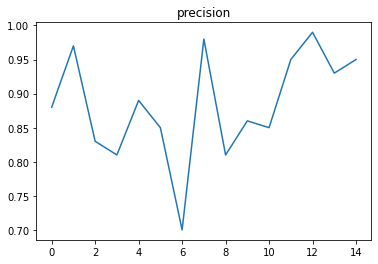

In [24]:
plt.plot(c, p)
plt.title('precision')
plt.show()

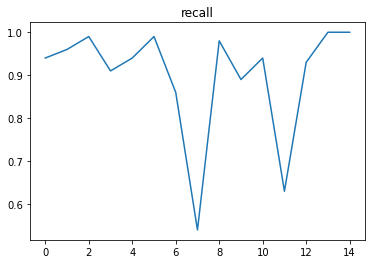

In [25]:
plt.plot(c, r)
plt.title('recall')
plt.show()

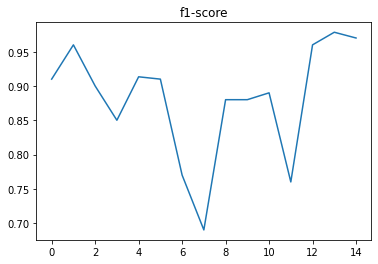

In [26]:
plt.plot(c, f)
plt.title('f1-score')
plt.show()

In [27]:
folders = natsorted(os.listdir(path))
len(folders)

15

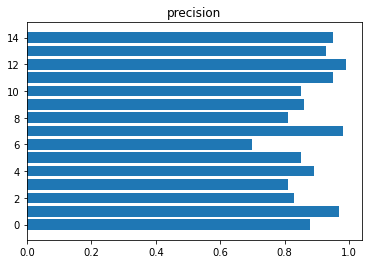

In [28]:
plt.barh(c, p)
plt.title('precision')
plt.show()

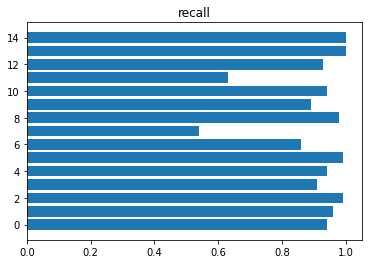

In [29]:
plt.barh(c, r)
plt.title('recall')
plt.show()

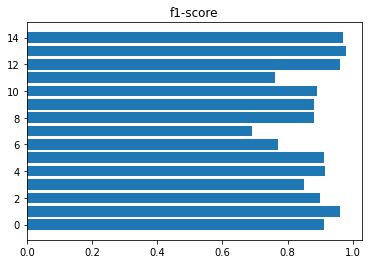

In [30]:
plt.barh(c, f)
plt.title('f1-score')
plt.show()

#Gradio

In [31]:
!pip install --quiet gradio

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 34.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 253 kB 35.7 MB/s 
     |████████████████████████████████| 1.1 MB 30.6 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 212 kB 44.6 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 144 kB 43.8 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 271 kB 41.1 MB/s 
     |████████████████████████████████| 59 kB 5.7 MB/s 
     |████████████████████████████████| 10.9 MB 34.6 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 62 kB 678 kB/s 
     |████████████████████████████████| 856 kB 43.9 MB/s 
     |████████████████████████

In [32]:
import gradio as gr
import tensorflow as tf
import requests
#Run the F1-score function and Loss Function 
model = load_model(r'/content/drive/MyDrive/mod/rb_model11.h5', custom_objects={'lossFunc':lossFunc})

# Download human-readable labels for ImageNet.
labels = natsorted(os.listdir('/content/drive/MyDrive/PlantVillage'))

def classify_image(inp):
  img_final = inp.copy()
  inp = inp.reshape((1, 96, 96, 3))
  inp = inp/255
  pred = model.predict(inp)
  flag = labels[np.argmax(pred[0])]
  return(flag)
  
  #return(output)
image = gr.inputs.Image(shape=(96, 96))
#label = gr.outputs.Label(num_top_classes=3)
#iface = gr.Interface(image_mod, gr.inputs.Image(type="pil"), "image")

v = 'body{background-image: url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLAYw2YT6u7VSCoN3Yk4ZxEIPkNhTAkVaOPA&usqp=CAU"); background-repeat:no-repeat; height:100%; background-position:center;background-size:cover}'
v = 'body{background-image: url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLAYw2YT6u7VSCoN3Yk4ZxEIPkNhTAkVaOPA&usqp=CAU");}'

description = "<h1 style='color:white'>PLANT DISEASE DETECTOR</h1><b><h3 style='color:white';>Share a picture of the plant to get immediate results!"

gr.Interface(fn=classify_image, inputs=image, outputs="label", description=description, css=v).launch(debug=False)
#gr.Interface(fn=classify_image, inputs=image, outputs="image").launch(debug=False)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://17170.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f5815852d50>,
 'http://127.0.0.1:7860/',
 'https://17170.gradio.app')

In [ ]:
model = load_model(r'/content/drive/MyDrive/mod/rb_model11.h5', custom_objects={'lossFunc':lossFunc})
labels = natsorted(os.listdir(path))

def classify_image(inp):
  img_final = inp.copy()
  inp = inp.reshape((1, 96, 96, 3))
  inp = inp/255
  pred = model.predict(inp)
  flag = labels[np.argmax(pred[0])]
  return(flag)

path = '/content/drive/MyDrive/PlantVillage'
for folder in os.listdir('/content/drive/MyDrive/PlantVillage'):
  out = []
  imgs = []
  print(folder, len(os.listdir(os.path.join(path, folder))))
  try:
    for i in tq(os.listdir(os.path.join(path, folder))):
      img = cv2.imread(os.path.join(path, folder, i))
      img = cv2.resize(img, (96, 96))
      #imgs.append(img)
      o = classify_image(img)
      out.append(o)
      #cv2.imwrite('/content/drive/MyDrive/freelancer1/output_c3/'+i, o)

    print(Counter(out))
    print("#########3")

  except:
    a=0

Tomato_Late_blight 1909


  0%|          | 0/1909 [00:00<?, ?it/s]

Counter({'Tomato_Late_blight': 1102, 'Tomato_Early_blight': 255, 'Potato___Late_blight': 175, 'Potato___Early_blight': 163, 'Tomato_Bacterial_spot': 77, 'Tomato_Septoria_leaf_spot': 67, 'Pepper__bell___Bacterial_spot': 26, 'Tomato_Leaf_Mold': 25, 'Pepper__bell___healthy': 7, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7, 'Tomato_healthy': 4, 'Potato___healthy': 1})
#########3
Tomato_Early_blight 1000


  0%|          | 0/1000 [00:00<?, ?it/s]

Counter({'Tomato_Early_blight': 861, 'Tomato_Septoria_leaf_spot': 46, 'Tomato_Bacterial_spot': 24, 'Tomato_Spider_mites_Two_spotted_spider_mite': 17, 'Tomato__Target_Spot': 16, 'Pepper__bell___Bacterial_spot': 12, 'Potato___Early_blight': 8, 'Tomato_Late_blight': 6, 'Potato___Late_blight': 5, 'Tomato_Leaf_Mold': 4, 'Pepper__bell___healthy': 1})
#########3
Tomato_healthy 1591


  0%|          | 0/1591 [00:00<?, ?it/s]

Counter({'Tomato_healthy': 1586, 'Tomato_Late_blight': 2, 'Pepper__bell___Bacterial_spot': 1, 'Tomato_Leaf_Mold': 1, 'Tomato_Septoria_leaf_spot': 1})
#########3
Tomato__Tomato_mosaic_virus 373


  0%|          | 0/373 [00:00<?, ?it/s]

Counter({'Tomato__Tomato_mosaic_virus': 372, 'Tomato_Leaf_Mold': 1})
#########3
Tomato_Leaf_Mold 952


  0%|          | 0/952 [00:00<?, ?it/s]

Counter({'Tomato_Leaf_Mold': 942, 'Tomato_Septoria_leaf_spot': 6, 'Tomato_Spider_mites_Two_spotted_spider_mite': 2, 'Tomato__Target_Spot': 1, 'Tomato_Early_blight': 1})
#########3
Pepper__bell___Bacterial_spot 1007


  0%|          | 0/1007 [00:00<?, ?it/s]

Counter({'Pepper__bell___Bacterial_spot': 961, 'Tomato_Septoria_leaf_spot': 21, 'Tomato_Bacterial_spot': 17, 'Potato___Early_blight': 3, 'Tomato_Early_blight': 3, 'Pepper__bell___healthy': 2})
#########3
Tomato_Spider_mites_Two_spotted_spider_mite 1676


  0%|          | 0/1676 [00:00<?, ?it/s]

#Doc

In this project, there are 15 category of plants are available

the dataset is very unbalanced, this makes more number of false postive predictions 

there are three ways to handle this unbalanced dataset, 



1.   make equal number of samples in all categories by reducing the samples
2.   generate more samples in those category of plants have less number of samples
3.   make use of class weights 

In this project, we are using the class weights to make the dataset balanced. 

Working steps of class weight method - the class weight doesnt reduce or generate samples to make the dataset balanced, instead, it makes the dataset balanced while training by providing an array, defining how much weight to give to each category or class, such that the model trains or learns that the dataset is in equal distrubution.

CNN - Model

In this project, we are using the VGG Architecture to train the model. 

Inference 

From the inference, we analyze that we achieved 97% of accuracy, and made the calculation of precision, recall, F1-score for each class.

the category Tomato_Target_spot is the least accuracy scored which is 82%
the category Pepper_bell_healthy, Potota_b, etc are the highest accuracy scored which is more than 99%
